# MUSHROOM-EDIBILITY

In [1]:
#eda-mushroom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox,zscore

In [2]:
ms=pd.read_csv('mushroom.csv',names=('status','cap_shape','cap_surface','cap_clr','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-no','ring-type','spore-color','popul','habitat'),header=0)
ms

,status,cap_shape,cap_surface,cap_clr,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-no,ring-type,spore-color,popul,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
ms.dtypes

status                      object
cap_shape                   object
cap_surface                 object
cap_clr                     object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-no                     object
ring-type                   object
spore-color                 object
popul                       object
habitat                     object
dtype: object

In [4]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
status                      8123 non-null object
cap_shape                   8123 non-null object
cap_surface                 8123 non-null object
cap_clr                     8123 non-null object
bruises                     8123 non-null object
odor                        8123 non-null object
gill-attachment             8123 non-null object
gill-spacing                8123 non-null object
gill-size                   8123 non-null object
gill-color                  8123 non-null object
stalk-shape                 8123 non-null object
stalk-root                  8123 non-null object
stalk-surface-above-ring    8123 non-null object
stalk-surface-below-ring    8123 non-null object
stalk-color-above-ring      8123 non-null object
stalk-color-below-ring      8123 non-null object
veil-type                   8123 non-null object
veil-color                  8123 non-null object
ring-no    

In [5]:
ms.columns

Index(['status', 'cap_shape', 'cap_surface', 'cap_clr', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-no',
       'ring-type', 'spore-color', 'popul', 'habitat'],
      dtype='object')

In [6]:
ms.head(5)

,status,cap_shape,cap_surface,cap_clr,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-no,ring-type,spore-color,popul,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [7]:
ms.shape

(8123, 23)

In [8]:
for i in ms.columns:
    x=ms[i].value_counts()
    print('the unique value counts of column ',i ,'is\n', x )
    print('_________________________________________________')

the unique value counts of column  status is
 e    4208
p    3915
Name: status, dtype: int64
_________________________________________________
the unique value counts of column  cap_shape is
 x    3655
f    3152
k     828
b     452
s      32
c       4
Name: cap_shape, dtype: int64
_________________________________________________
the unique value counts of column  cap_surface is
 y    3244
s    2555
f    2320
g       4
Name: cap_surface, dtype: int64
_________________________________________________
the unique value counts of column  cap_clr is
 n    2283
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap_clr, dtype: int64
_________________________________________________
the unique value counts of column  bruises is
 f    4748
t    3375
Name: bruises, dtype: int64
_________________________________________________
the unique value counts of column  odor is
 n    3528
f    2160
y     576
s     576
l     400
a     400
p     255
c     192
m

In [9]:
o=['object']
ms.describe(include=o)

,status,cap_shape,cap_surface,cap_clr,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-no,ring-type,spore-color,popul,habitat
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


In [10]:
#it shows a (count) of 8123 rows 
#with (unique) values of each attributes/columns
#and (max/top) occurance of each quality in their respective columns with (freq) of occurance

In [11]:
msx=ms.iloc[:,1:]
msx

,cap_shape,cap_surface,cap_clr,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-no,ring-type,spore-color,popul,habitat
0,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
1,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
2,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
3,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
4,x,y,y,t,a,f,c,b,n,e,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8119,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8120,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8121,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [12]:
msy=ms.iloc[:,0]
msy

0       e
1       e
2       p
3       e
4       e
       ..
8118    e
8119    e
8120    e
8121    p
8122    e
Name: status, Length: 8123, dtype: object

In [13]:
ms=pd.concat((msx,msy),axis=1)
ms

,cap_shape,cap_surface,cap_clr,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-no,ring-type,spore-color,popul,habitat,status
0,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
1,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
2,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
3,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
4,x,y,y,t,a,f,c,b,n,e,...,w,w,p,w,o,p,k,n,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8119,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8120,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8121,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


In [14]:
cl=ms.columns.values
cl

array(['cap_shape', 'cap_surface', 'cap_clr', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-no',
       'ring-type', 'spore-color', 'popul', 'habitat', 'status'],
      dtype=object)

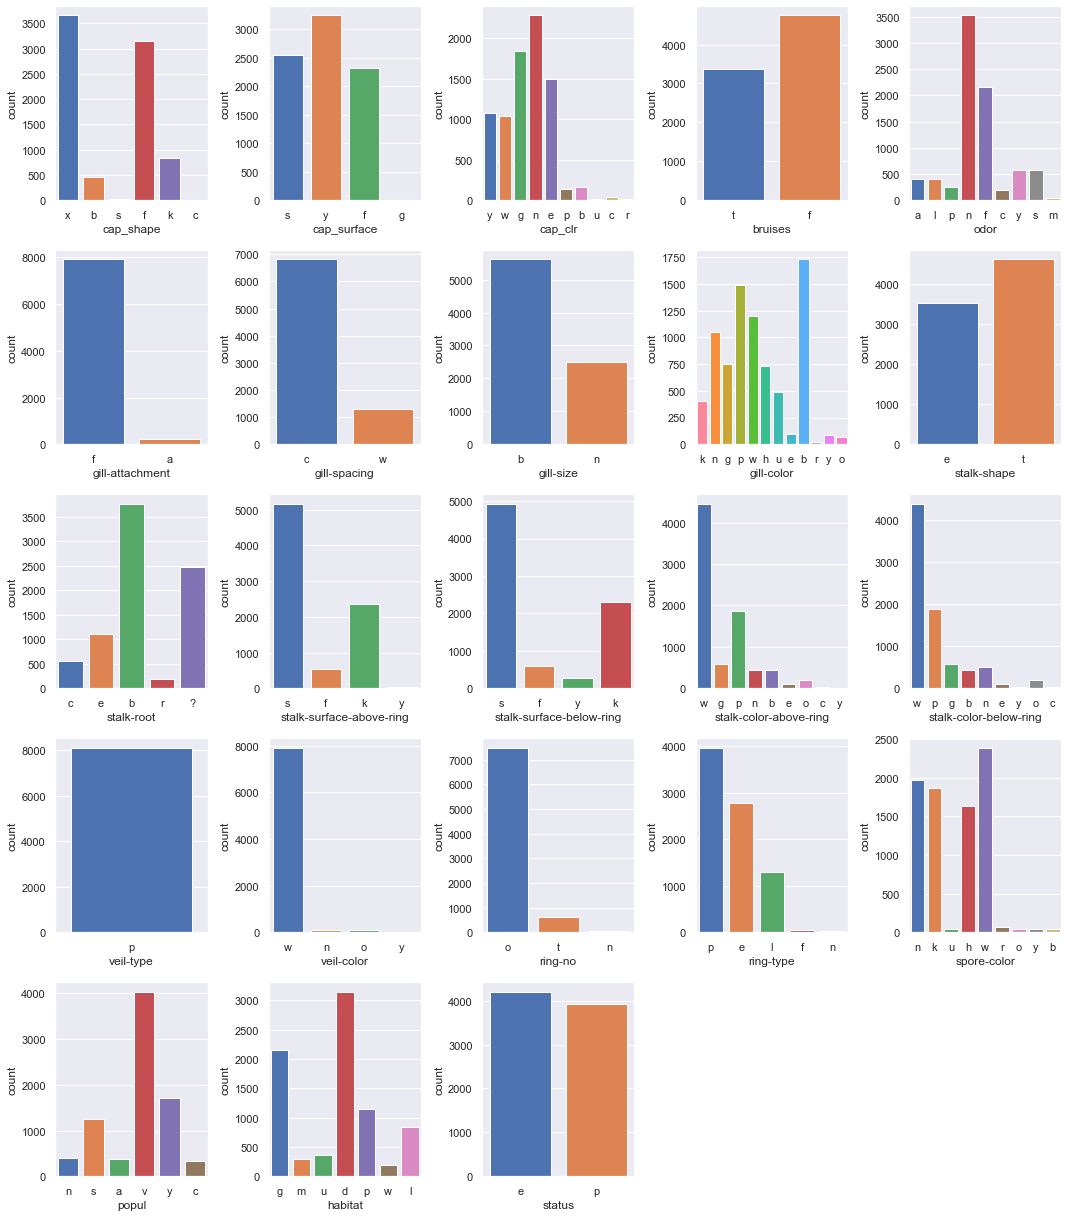

In [15]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,20))
for i in range (0, 23):
    plt.subplot(6,5,i+1)
    sns.countplot(ms[cl[i]],saturation=9)

plt.tight_layout()
#count of all data given

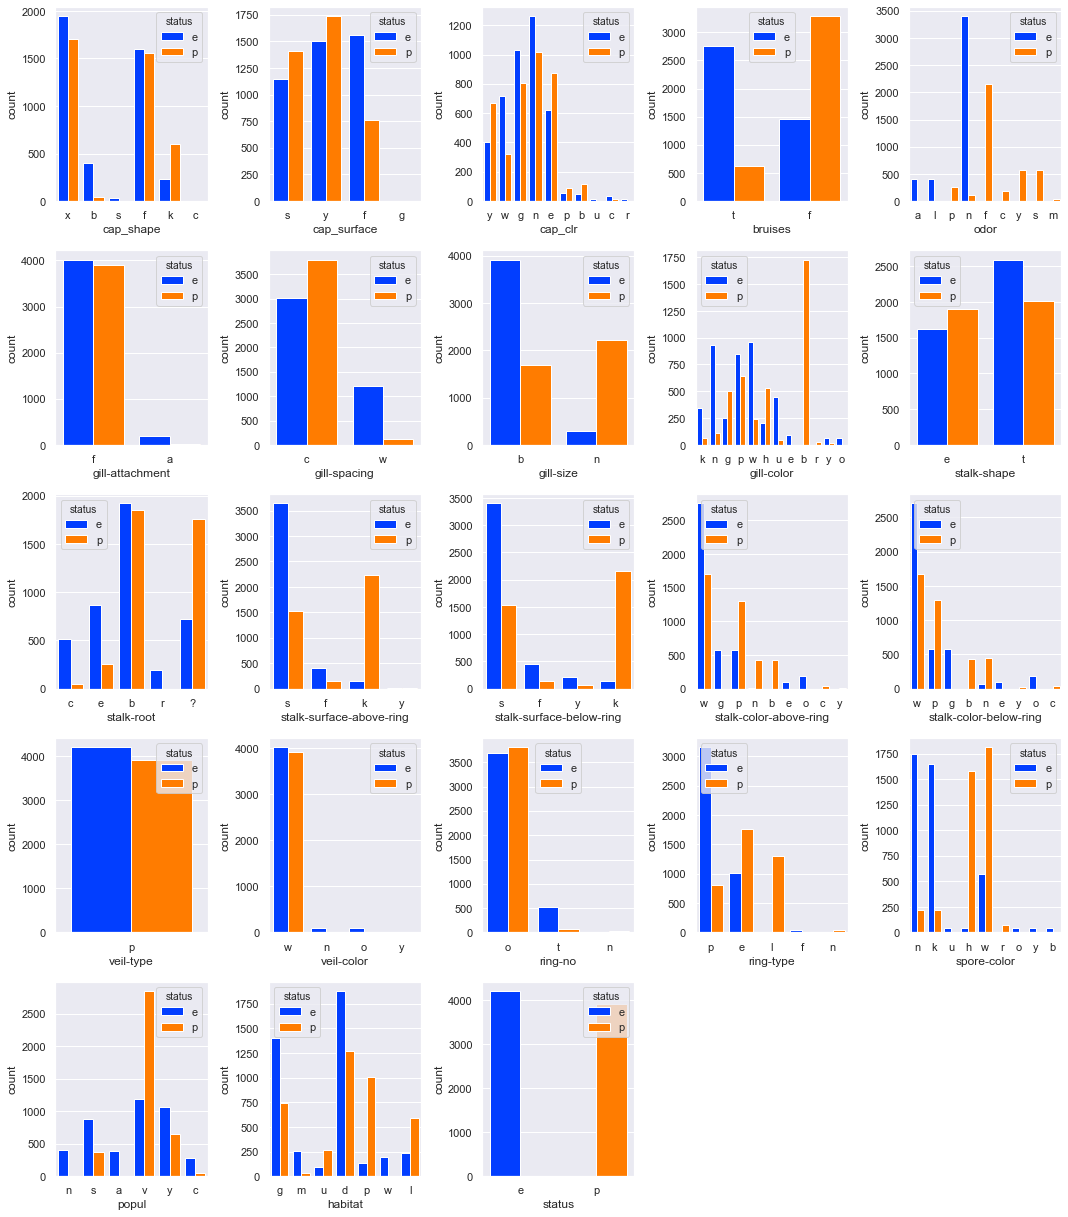

In [16]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,20))
for i in range (0, 23):
    plt.subplot(6,5,i+1)
    sns.countplot(ms[cl[i]],saturation=9,hue=ms[cl[22]],palette='bright')

plt.tight_layout()
#count of all data by interms of edibility and poision

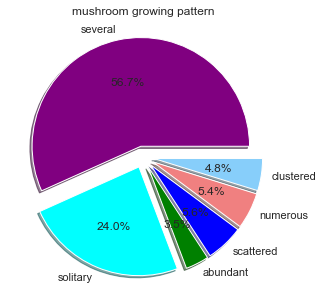

In [17]:
#population of mushroom pie chart
plt.figure(figsize=(5,5))
ppl=[4040,1712,247,400,384,340]
#value counts
ppl_sprd='several','solitary','abundant','scattered','numerous','clustered'
#spred in
clr = ['purple', 'cyan', 'green', 'blue', 'lightcoral', 'lightskyblue']
e = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
#exploding parts
plt.pie(ppl, explode=e, labels=ppl_sprd, colors=clr, shadow=True,autopct='%1.1f%%')
plt.title('mushroom growing pattern')
plt.show()

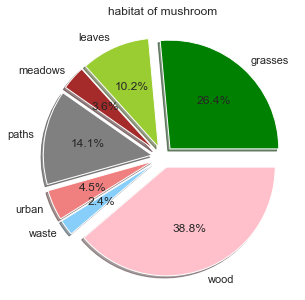

In [18]:
#habitat of mushroom
plt.figure(figsize=(5,5))
hbt='grasses','leaves','meadows','paths', 'urban','waste','wood'
presence=[2148,832,292,1144,367,192,3148]
clr = ['green', 'yellowgreen', 'brown', 'gray', 'lightcoral', 'lightskyblue','pink']
e = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1)
#exploding parts
plt.pie(presence, explode=e, labels=hbt, colors=clr, shadow=True,autopct='%2.1f%%')
plt.title('habitat of mushroom')
plt.show()

In [19]:
ctab=pd.crosstab(ms['gill-color'],ms['status'])
ctab
#cross checking the kind of gill color with it's edibale quality

status,e,p
gill-color,,
b,0,1728
e,96,0
g,248,504
h,204,528
k,344,63
n,936,112
o,64,0
p,852,640
r,0,24


In [20]:
for i in  ms.columns:
    print(pd.crosstab(ms[i],ms['status']))
    #cross_checkig each value representing quality of mushrrom i.e. edible or poisionous 

status        e     p
cap_shape            
b           404    48
c             0     4
f          1596  1556
k           228   600
s            32     0
x          1948  1707
status          e     p
cap_surface            
f            1560   760
g               0     4
s            1144  1411
y            1504  1740
status      e     p
cap_clr            
b          48   120
c          32    12
e         624   876
g        1032   808
n        1264  1019
p          56    88
r          16     0
u          16     0
w         720   320
y         400   672
status      e     p
bruises            
f        1456  3292
t        2752   623
status     e     p
odor              
a        400     0
c          0   192
f          0  2160
l        400     0
m          0    36
n       3408   120
p          0   255
s          0   576
y          0   576
status              e     p
gill-attachment            
a                 192    18
f                4016  3897
status           e     p
gill-spacing  

In [21]:
status = {"e": 1, "p": 0}
ms['status']=ms['status'].map(status)
ms['status']
#renaming the edible with 1 and poisionous with 0

0       1
1       1
2       0
3       1
4       1
       ..
8118    1
8119    1
8120    1
8121    0
8122    1
Name: status, Length: 8123, dtype: int64

In [22]:
ms

,cap_shape,cap_surface,cap_clr,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-no,ring-type,spore-color,popul,habitat,status
0,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,1
1,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,1
2,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,0
3,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,1
4,x,y,y,t,a,f,c,b,n,e,...,w,w,p,w,o,p,k,n,g,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,1
8119,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,1
8120,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,1
8121,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,0


In [23]:
x=ms.iloc[:,0:22]
y=ms.iloc[:,-1]

In [24]:
#label encoding
for i in x.columns:
    le=LabelEncoder()
    x[i]=le.fit_transform(x[i])

In [25]:
x

,cap_shape,cap_surface,cap_clr,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-no,ring-type,spore-color,popul,habitat
0,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
1,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
2,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
3,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
4,5,3,9,1,0,1,0,0,5,0,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8119,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8120,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8121,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [26]:
cl=x.columns.values

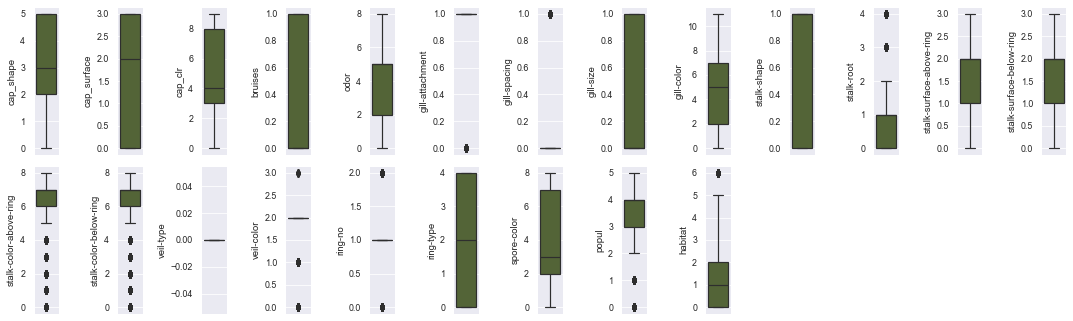

In [27]:
#outlier checking

sns.set(style='darkgrid')
sns.set_context("paper")
plt.figure(figsize=(15,20))
for i in range (0,22):
    plt.subplot(9,13,i+1)
    sns.boxplot(x[cl[i]], color='darkolivegreen' ,orient='v')
plt.tight_layout()

In [28]:
#removing outliers by zscore will drain the entire dataframe empty

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,roc_auc_score,auc,roc_curve

from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

import joblib

In [30]:
#finding best_suited random_state

In [31]:
def rst(mod,x,y):
    max_r=0
    for rn_state in range (25,120):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.28,random_state=rn_state)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        acs=accuracy_score(pred,y_test)
        f1=f1_score(y_test,pred)
        cnf=confusion_matrix(y_test,pred)
        clr=classification_report(y_test,pred)
        if acs>max_r:
            max_r=acs
            random_state=rn_state
    print('the random_state for ',mod,' is ',random_state,' which gives an accuracy score of ',max_r )
    print('f1_score = ', f1)
    print('confusion matrix ::\n', cnf)
    print('classification report::\n',clr)
    return random_state

In [32]:
#logisticregression

In [33]:
logi=LogisticRegression()
rst(logi,x,y)

the random_state for  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)  is  47  which gives an accuracy score of  0.9582417582417583
f1_score =  0.9506688963210702
confusion matrix ::
 [[1020   71]
 [  47 1137]]
classification report::
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      1091
           1       0.94      0.96      0.95      1184

    accuracy                           0.95      2275
   macro avg       0.95      0.95      0.95      2275
weighted avg       0.95      0.95      0.95      2275



47

In [34]:
#checking for fitting

In [35]:
scr_logi=cross_val_score(logi,x,y,cv=30,scoring='accuracy')
print('the accuracy score for logi model is :', scr_logi.mean())

the accuracy score for logi model is : 0.9287056766809499


In [36]:
#decisionTreeClassifier

In [37]:
dtc=DecisionTreeClassifier()
dtc_para={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth': range(4,10)}
dtc_gs=GridSearchCV(dtc,dtc_para,cv=20)
dtc_gs.fit(x,y)
print(dtc_gs)
print(dtc_gs.best_params_)


GridSearchCV(cv=20, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 10),
                        

In [38]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=7,splitter='best')
rst(dtc,x,y)

the random_state for  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')  is  25  which gives an accuracy score of  1.0
f1_score =  1.0
confusion matrix ::
 [[1091    0]
 [   0 1184]]
classification report::
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1091
           1       1.00      1.00      1.00      1184

    accuracy                           1.00      2275
   macro avg       1.00      1.00      1.00      2275
weighted avg       1.00      1.00      1.00      2275



25

In [39]:
#fitting

In [40]:
scr_dtc=cross_val_score(dtc,x,y,cv=30,scoring='accuracy')
print('the accuracy score of dtc model is: ', scr_dtc.mean())

the accuracy score of dtc model is:  1.0


In [41]:
#SupportVectorclassifier

In [42]:
svc=SVC()
svc_para={'kernel':['rbf','poly','linear'],'gamma':[0.01,0.1]}
svc_grid=GridSearchCV(svc,svc_para,cv=20)
svc_grid.fit(x,y)
print(svc_grid)
print(svc_grid.best_params_)

GridSearchCV(cv=20, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'gamma': [0.01, 0.1],
                         'kernel': ['rbf', 'poly', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
{'gamma': 0.1, 'kernel': 'rbf'}


In [44]:
svc=SVC(kernel='rbf',C=1.0 ,degree=3 ,gamma=0.1)
rst(svc,x,y)

the random_state for  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)  is  25  which gives an accuracy score of  1.0
f1_score =  1.0
confusion matrix ::
 [[1091    0]
 [   0 1184]]
classification report::
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1091
           1       1.00      1.00      1.00      1184

    accuracy                           1.00      2275
   macro avg       1.00      1.00      1.00      2275
weighted avg       1.00      1.00      1.00      2275



25

In [ ]:
#checking fitting

In [45]:
scr_svc=cross_val_score(svc,x,y,cv=30,scoring='accuracy')
print('the accuracy score of svc model: ',scr_svc.mean())

the accuracy score of svc model:  1.0


In [ ]:
#KneighborsClassifier

In [50]:
knc=KNeighborsClassifier()
knc_para={'n_neighbors':range(20,65),'algorithm':['ball_tree','kd_tree','brute'],'leaf_size':[10,30,35]}
knc_grd=GridSearchCV(knc,knc_para,cv=20)
knc_grd.fit(x,y)
print(knc_grd)
print(knc_grd.best_params_)

GridSearchCV(cv=20, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 30, 35],
                         'n_neighbors': range(20, 65)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
{'algorithm': 'kd_tree', 'leaf_size': 30, 'n_neighbors': 20}


In [51]:
knc=KNeighborsClassifier(n_neighbors=20,algorithm='kd_tree',leaf_size=30)
rst(knc,x,y)

the random_state for  KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')  is  48  which gives an accuracy score of  0.9978021978021978
f1_score =  0.991617770326907
confusion matrix ::
 [[1072   19]
 [   1 1183]]
classification report::
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1091
           1       0.98      1.00      0.99      1184

    accuracy                           0.99      2275
   macro avg       0.99      0.99      0.99      2275
weighted avg       0.99      0.99      0.99      2275



48

In [52]:
#fitting check

In [53]:
knc_scr=cross_val_score(knc,x,y,cv=30,scoring='accuracy')
print('the accuracy score at knc model is: ', knc_scr.mean())

the accuracy score at knc model is:  0.9895615836877324


In [ ]:
#gnb

In [54]:
gnb=GaussianNB()
rst(gnb,x,y)

the random_state for  GaussianNB(priors=None, var_smoothing=1e-09)  is  43  which gives an accuracy score of  0.9415384615384615
f1_score =  0.9175170068027211
confusion matrix ::
 [[1002   89]
 [ 105 1079]]
classification report::
               precision    recall  f1-score   support

           0       0.91      0.92      0.91      1091
           1       0.92      0.91      0.92      1184

    accuracy                           0.91      2275
   macro avg       0.91      0.91      0.91      2275
weighted avg       0.91      0.91      0.91      2275



43

In [56]:
gnb_scr=cross_val_score(gnb,x,y,cv=30,scoring='accuracy')
print('the accuracy score at gnb: ',gnb_scr.mean())

the accuracy score at gnb:  0.8991255825139949


In [60]:
svc=svc=SVC(kernel='rbf',C=1.0 ,degree=3 ,gamma=0.1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.28,random_state=25)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
acs=accuracy_score(pred,y_test)
f1=f1_score(y_test,pred)
cnf=confusion_matrix(y_test,pred)
clr=classification_report(y_test,pred)
print("pred=:\n", pred ,'\n')
print('the accuracy score is',acs )
print('f1_score = ', f1)
print('confusion matrix ::\n', cnf)
print('classification report::\n',clr)


pred=:
 [1 0 1 ... 0 0 0] 

the accuracy score is 1.0
f1_score =  1.0
confusion matrix ::
 [[1123    0]
 [   0 1152]]
classification report::
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1123
           1       1.00      1.00      1.00      1152

    accuracy                           1.00      2275
   macro avg       1.00      1.00      1.00      2275
weighted avg       1.00      1.00      1.00      2275



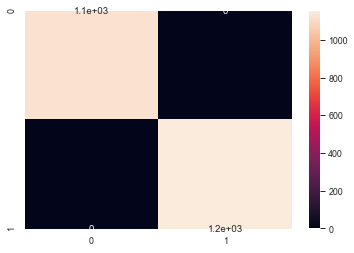

In [67]:
sns.heatmap(cnf,annot=True)

In [62]:
#auc_roc parameters

In [68]:
tpr,fpr,threshold=roc_curve(y_test,pred)

In [77]:
tpr.mean()

0.3333333333333333

In [78]:
fpr.mean()

0.6666666666666666

In [71]:
threshold

array([2, 1, 0], dtype=int64)

In [79]:
scores=roc_auc_score(y_test,pred)
scores

1.0

In [85]:
roc_auc=auc(tpr,fpr)
roc_auc

1.0

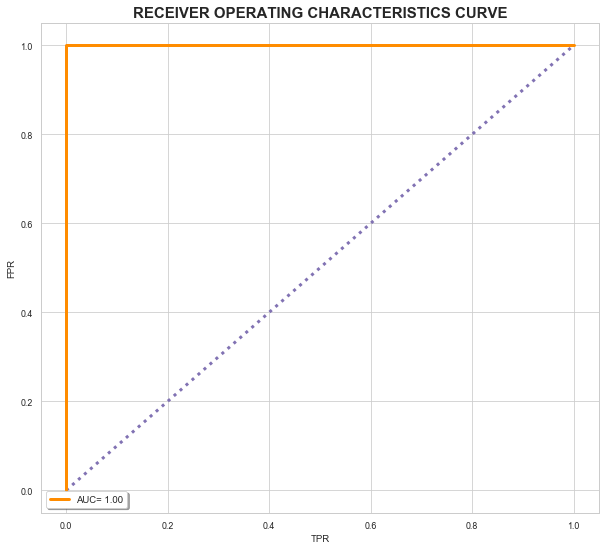

In [92]:
sns.set(style='whitegrid')
sns.set_context('paper')
plt.figure(figsize=(10,9))
plt.plot([0,1],[0,1],color='m',linestyle=":",lw=3)
plt.plot(tpr,fpr,label="AUC= %0.2f" % roc_auc,color='darkorange',lw=3)
plt.legend(loc='lower left',fontsize='medium',shadow=True)
plt.xlabel("TPR")
plt.ylabel('FPR')
plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE',size=15,weight='bold',loc='center')
plt.show()

In [93]:
joblib.dump(svc,"MUSHROOMS_SVC.pkl")

['MUSHROOMS_SVC.pkl']